<a href="https://colab.research.google.com/github/zeel2321-lit/Stock_Price_Prediction_/blob/main/Stock_Price_Prediction_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# implementation of stock price prediction using Support Vector Machine 
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the csv file using read_csv 

df = pd.read_csv('/content/RELIANCE.NS (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-04-2017,664.699341,683.768555,662.247559,680.871033,663.438965,20715169
1,05-04-2017,691.049561,702.342468,683.570435,700.856567,682.912842,18609462
2,06-04-2017,697.884766,717.647400,694.516663,712.496277,694.254578,23361514
3,07-04-2017,703.976990,710.267395,694.690063,696.696045,678.858887,14710432
4,10-04-2017,698.380066,705.760071,682.183594,684.189575,666.672546,14199616
...,...,...,...,...,...,...,...
1232,29-03-2022,2638.000000,2638.000000,2607.399902,2622.550049,2622.550049,4007695
1233,30-03-2022,2639.899902,2688.000000,2617.100098,2672.949951,2672.949951,7297028
1234,31-03-2022,2664.949951,2669.699951,2628.600098,2634.750000,2634.750000,6102744
1235,01-04-2022,2636.000000,2665.149902,2622.000000,2655.850098,2655.850098,3656408


In [ ]:
# The data needed to be processed before use such that the date column should act as an index to do that 

# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df
  
# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-04,664.699341,683.768555,662.247559,680.871033,663.438965,20715169
2017-05-04,691.049561,702.342468,683.570435,700.856567,682.912842,18609462
2017-06-04,697.884766,717.647400,694.516663,712.496277,694.254578,23361514
2017-07-04,703.976990,710.267395,694.690063,696.696045,678.858887,14710432
2017-10-04,698.380066,705.760071,682.183594,684.189575,666.672546,14199616
...,...,...,...,...,...,...
2022-03-29,2638.000000,2638.000000,2607.399902,2622.550049,2622.550049,4007695
2022-03-30,2639.899902,2688.000000,2617.100098,2672.949951,2672.949951,7297028
2022-03-31,2664.949951,2669.699951,2628.600098,2634.750000,2634.750000,6102744


In [ ]:
# Explanatory or independent variables are used to predict the value response variable.
# The X is a dataset that holds the variables which are used for prediction.
# The X consists of variables such as ‘Open – Close’ and ‘High – Low’.
# These can be understood as indicators based on which the algorithm will predict tomorrow’s trend.

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2017-03-04,-16.171692,21.520996
2017-05-04,-9.807006,18.772033
2017-06-04,-14.611511,23.130737
2017-07-04,7.280945,15.577332
2017-10-04,14.190491,23.576477


In [ ]:
# the syntax for target the variable is 
# np.where(condition,value_if_true,value_if_false)

#Defining the Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y


array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
# splitting the dataset into training and testing
split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# will use SVC() function from sklearn.svm.SVC library to create our classifier model using the fit() method on the training data set.
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:
#df['Predicted_Signal'] = cls.predict(X_test)
pred=cls.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,pred))

Accuracy: 0.5362903225806451


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,pred)
cnf_matrix


array([[38, 71],
       [44, 95]])

In [ ]:
Predicted_Signal = df[split:]

In [ ]:

# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [ ]:

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
# predicted signal ---> 1 then gain 

In [ ]:

# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df
# on daily basis 

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2017-03-04,664.699341,683.768555,662.247559,680.871033,663.438965,20715169,-16.171692,21.520996,1,NaN,NaN,NaN
2017-05-04,691.049561,702.342468,683.570435,700.856567,682.912842,18609462,-9.807006,18.772033,1,0.029353,0.029353,0.029353
2017-06-04,697.884766,717.647400,694.516663,712.496277,694.254578,23361514,-14.611511,23.130737,1,0.016608,0.016608,0.045961
2017-07-04,703.976990,710.267395,694.690063,696.696045,678.858887,14710432,7.280945,15.577332,1,-0.022176,-0.022176,0.023785
2017-10-04,698.380066,705.760071,682.183594,684.189575,666.672546,14199616,14.190491,23.576477,1,-0.017951,-0.017951,0.005834
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29,2638.000000,2638.000000,2607.399902,2622.550049,2622.550049,4007695,15.449951,30.600098,0,0.000229,0.000229,1.587125
2022-03-30,2639.899902,2688.000000,2617.100098,2672.949951,2672.949951,7297028,-33.050049,70.899902,1,0.019218,0.000000,1.606343
2022-03-31,2664.949951,2669.699951,2628.600098,2634.750000,2634.750000,6102744,30.199951,41.099853,0,-0.014291,-0.014291,1.592052


In [ ]:

# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2017-03-04,664.699341,683.768555,662.247559,680.871033,663.438965,20715169,-16.171692,21.520996,1,NaN,NaN,NaN,NaN
2017-05-04,691.049561,702.342468,683.570435,700.856567,682.912842,18609462,-9.807006,18.772033,1,0.029353,0.029353,0.029353,0.029353
2017-06-04,697.884766,717.647400,694.516663,712.496277,694.254578,23361514,-14.611511,23.130737,1,0.016608,0.016608,0.045961,0.045961
2017-07-04,703.976990,710.267395,694.690063,696.696045,678.858887,14710432,7.280945,15.577332,1,-0.022176,-0.022176,0.023785,0.023785
2017-10-04,698.380066,705.760071,682.183594,684.189575,666.672546,14199616,14.190491,23.576477,1,-0.017951,-0.017951,0.005834,0.005834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29,2638.000000,2638.000000,2607.399902,2622.550049,2622.550049,4007695,15.449951,30.600098,0,0.000229,0.000229,1.587125,1.680072
2022-03-30,2639.899902,2688.000000,2617.100098,2672.949951,2672.949951,7297028,-33.050049,70.899902,1,0.019218,0.000000,1.606343,1.680072
2022-03-31,2664.949951,2669.699951,2628.600098,2634.750000,2634.750000,6102744,30.199951,41.099853,0,-0.014291,-0.014291,1.592052,1.665781


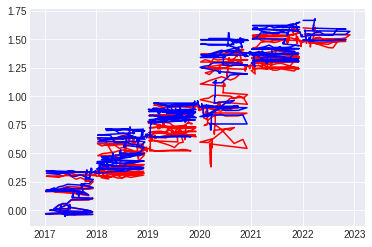

In [ ]:
# plotting strategy return Vs original
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

In [ ]:
# Our Strategy(Blue Line) Provided the return of 18.87 % in the last 1 year whereas the stock of Reliance Industries (Red Line) Provides
# the Return of just 5.97%  in the last 1 year.
#  Currently, I have just trained the model based on previous day levels 
#however to increase the accuracy of the model we also add various Technical Indicators for training the model 